In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [16]:
sonar=pd.read_csv('sonar.csv')

In [17]:
sonar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      208 non-null    float64
 1   V2      208 non-null    float64
 2   V3      208 non-null    float64
 3   V4      208 non-null    float64
 4   V5      208 non-null    float64
 5   V6      208 non-null    float64
 6   V7      208 non-null    float64
 7   V8      208 non-null    float64
 8   V9      208 non-null    float64
 9   V10     208 non-null    float64
 10  V11     208 non-null    float64
 11  V12     208 non-null    float64
 12  V13     208 non-null    float64
 13  V14     208 non-null    float64
 14  V15     208 non-null    float64
 15  V16     208 non-null    float64
 16  V17     208 non-null    float64
 17  V18     208 non-null    float64
 18  V19     208 non-null    float64
 19  V20     208 non-null    float64
 20  V21     208 non-null    float64
 21  V22     208 non-null    float64
 22  V2

In [18]:
sonar

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


In [19]:
sonar.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'Class'],
      dtype='object')

In [20]:
sonar.dtypes

V1       float64
V2       float64
V3       float64
V4       float64
V5       float64
          ...   
V57      float64
V58      float64
V59      float64
V60      float64
Class      int64
Length: 61, dtype: object

In [21]:
sonar.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.466346
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,0.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [22]:
sonar.skew()

V1       2.131088
V2       2.155644
V3       2.652518
V4       3.401697
V5       2.018141
           ...   
V57      1.653090
V58      2.098330
V59      1.737506
V60      2.775754
Class    0.135903
Length: 61, dtype: float64

In [31]:
for col in sonar.columns:
    if sonar.skew().loc[col]>0.55:
        sonar[col]=np.log1p(sonar[col])

In [32]:
#reduced skewness
sonar.skew()

V1       2.036001
V2       1.969917
V3       2.344713
V4       2.818320
V5       1.698684
           ...   
V57      1.629182
V58      2.058207
V59      1.713349
V60      2.711412
Class    0.135903
Length: 61, dtype: float64

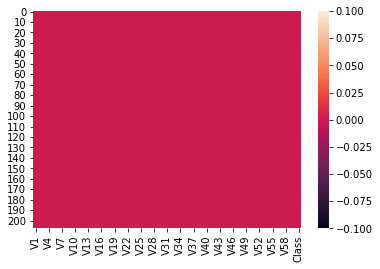

In [24]:
sns.heatmap(sonar.isnull())

In [33]:
from scipy.stats import zscore
z_score=abs(zscore(sonar))
print(sonar.shape)
sonar_df=sonar.loc[(z_score<3).all(axis=1)]
print(sonar_df.shape)

(208, 61)
(173, 61)


In [34]:
sonar_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.019803,0.036428,0.041909,0.020489,0.091120,0.094037,0.143148,0.148506,0.270714,0.191529,...,0.002696,0.006479,0.015775,0.007174,0.016562,0.017840,0.008365,0.008960,0.003195,1
1,0.044304,0.050978,0.080935,0.066630,0.111810,0.229762,0.195238,0.298696,0.287957,0.252469,...,0.008365,0.008861,0.004789,0.009356,0.018920,0.013903,0.004888,0.005187,0.004390,1
3,0.009950,0.016955,0.060436,0.020293,0.020293,0.036139,0.104180,0.120091,0.058080,0.119027,...,0.012027,0.003594,0.014889,0.008464,0.007273,0.004988,0.004390,0.003992,0.011632,1
4,0.073436,0.064476,0.046979,0.038644,0.057325,0.062881,0.114132,0.220500,0.304834,0.368732,...,0.003095,0.005385,0.010445,0.010940,0.001499,0.007174,0.004789,0.010643,0.009356,1
5,0.028199,0.044304,0.027323,0.017250,0.037681,0.094401,0.113418,0.168307,0.191033,0.265360,...,0.004490,0.001399,0.003793,0.001299,0.008861,0.005684,0.002696,0.005087,0.006181,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.018527,0.034015,0.016660,0.017545,0.038547,0.151003,0.184652,0.156491,0.209288,0.237756,...,0.011533,0.009752,0.019705,0.003295,0.010049,0.006479,0.011434,0.019116,0.015578,0
204,0.031789,0.010049,0.029365,0.054867,0.073250,0.091485,0.094401,0.096945,0.098034,0.195073,...,0.006081,0.009257,0.013410,0.006280,0.006280,0.003394,0.003195,0.006181,0.006678,0
205,0.050883,0.042772,0.017840,0.028782,0.034498,0.110736,0.118405,0.111362,0.118494,0.225461,...,0.015873,0.002896,0.005087,0.006181,0.008861,0.013903,0.013706,0.007671,0.003095,0
206,0.029850,0.034691,0.047837,0.059023,0.016562,0.126985,0.136714,0.106430,0.177728,0.211395,...,0.008563,0.004589,0.012521,0.003594,0.003494,0.003394,0.007869,0.003594,0.004789,0


In [35]:
sonar_df=pd.DataFrame(data=sonar_df)
sonar_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.019803,0.036428,0.041909,0.020489,0.091120,0.094037,0.143148,0.148506,0.270714,0.191529,...,0.002696,0.006479,0.015775,0.007174,0.016562,0.017840,0.008365,0.008960,0.003195,1
1,0.044304,0.050978,0.080935,0.066630,0.111810,0.229762,0.195238,0.298696,0.287957,0.252469,...,0.008365,0.008861,0.004789,0.009356,0.018920,0.013903,0.004888,0.005187,0.004390,1
3,0.009950,0.016955,0.060436,0.020293,0.020293,0.036139,0.104180,0.120091,0.058080,0.119027,...,0.012027,0.003594,0.014889,0.008464,0.007273,0.004988,0.004390,0.003992,0.011632,1
4,0.073436,0.064476,0.046979,0.038644,0.057325,0.062881,0.114132,0.220500,0.304834,0.368732,...,0.003095,0.005385,0.010445,0.010940,0.001499,0.007174,0.004789,0.010643,0.009356,1
5,0.028199,0.044304,0.027323,0.017250,0.037681,0.094401,0.113418,0.168307,0.191033,0.265360,...,0.004490,0.001399,0.003793,0.001299,0.008861,0.005684,0.002696,0.005087,0.006181,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.018527,0.034015,0.016660,0.017545,0.038547,0.151003,0.184652,0.156491,0.209288,0.237756,...,0.011533,0.009752,0.019705,0.003295,0.010049,0.006479,0.011434,0.019116,0.015578,0
204,0.031789,0.010049,0.029365,0.054867,0.073250,0.091485,0.094401,0.096945,0.098034,0.195073,...,0.006081,0.009257,0.013410,0.006280,0.006280,0.003394,0.003195,0.006181,0.006678,0
205,0.050883,0.042772,0.017840,0.028782,0.034498,0.110736,0.118405,0.111362,0.118494,0.225461,...,0.015873,0.002896,0.005087,0.006181,0.008861,0.013903,0.013706,0.007671,0.003095,0
206,0.029850,0.034691,0.047837,0.059023,0.016562,0.126985,0.136714,0.106430,0.177728,0.211395,...,0.008563,0.004589,0.012521,0.003594,0.003494,0.003394,0.007869,0.003594,0.004789,0


In [38]:
#x and y values allocation for training and testing
x=sonar_df.iloc[:,0:-1]

In [39]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
0,0.019803,0.036428,0.041909,0.020489,0.091120,0.094037,0.143148,0.148506,0.270714,0.191529,...,0.022935,0.002696,0.006479,0.015775,0.007174,0.016562,0.017840,0.008365,0.008960,0.003195
1,0.044304,0.050978,0.080935,0.066630,0.111810,0.229762,0.195238,0.298696,0.287957,0.252469,...,0.012423,0.008365,0.008861,0.004789,0.009356,0.018920,0.013903,0.004888,0.005187,0.004390
3,0.009950,0.016955,0.060436,0.020293,0.020293,0.036139,0.104180,0.120091,0.058080,0.119027,...,0.023814,0.012027,0.003594,0.014889,0.008464,0.007273,0.004988,0.004390,0.003992,0.011632
4,0.073436,0.064476,0.046979,0.038644,0.057325,0.062881,0.114132,0.220500,0.304834,0.368732,...,0.015480,0.003095,0.005385,0.010445,0.010940,0.001499,0.007174,0.004789,0.010643,0.009356
5,0.028199,0.044304,0.027323,0.017250,0.037681,0.094401,0.113418,0.168307,0.191033,0.265360,...,0.010346,0.004490,0.001399,0.003793,0.001299,0.008861,0.005684,0.002696,0.005087,0.006181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.018527,0.034015,0.016660,0.017545,0.038547,0.151003,0.184652,0.156491,0.209288,0.237756,...,0.020097,0.011533,0.009752,0.019705,0.003295,0.010049,0.006479,0.011434,0.019116,0.015578
204,0.031789,0.010049,0.029365,0.054867,0.073250,0.091485,0.094401,0.096945,0.098034,0.195073,...,0.005087,0.006081,0.009257,0.013410,0.006280,0.006280,0.003394,0.003195,0.006181,0.006678
205,0.050883,0.042772,0.017840,0.028782,0.034498,0.110736,0.118405,0.111362,0.118494,0.225461,...,0.015381,0.015873,0.002896,0.005087,0.006181,0.008861,0.013903,0.013706,0.007671,0.003095
206,0.029850,0.034691,0.047837,0.059023,0.016562,0.126985,0.136714,0.106430,0.177728,0.211395,...,0.004191,0.008563,0.004589,0.012521,0.003594,0.003494,0.003394,0.007869,0.003594,0.004789


In [40]:
x.shape

(173, 60)

In [41]:
pca=PCA(n_components=15)

In [42]:
x=pca.fit_transform(x)

In [43]:
x.shape

(173, 15)

In [44]:
y=sonar_df.iloc[:,-1]

In [45]:
y

0      1
1      1
3      1
4      1
5      1
      ..
203    0
204    0
205    0
206    0
207    0
Name: Class, Length: 173, dtype: int64

In [46]:
y.shape

(173,)

In [47]:
sonar.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
V1,1.000000,0.735222,0.570685,0.485743,0.336469,0.244380,0.260978,0.351766,0.348769,0.312130,...,0.353387,0.312563,0.320664,0.312684,0.224352,0.316519,0.371517,0.358920,0.348455,-0.272710
V2,0.735222,1.000000,0.773040,0.590833,0.404392,0.334846,0.278614,0.337122,0.318649,0.269347,...,0.434345,0.348536,0.389019,0.384052,0.270146,0.286026,0.358558,0.354793,0.358427,-0.232735
V3,0.570685,0.773040,1.000000,0.765006,0.524464,0.351185,0.192678,0.246778,0.263476,0.226283,...,0.396473,0.335055,0.371859,0.294545,0.298219,0.388956,0.342265,0.431001,0.375295,-0.194547
V4,0.485743,0.590833,0.765006,1.000000,0.708444,0.362016,0.252227,0.260257,0.252504,0.242135,...,0.379065,0.370981,0.343071,0.292765,0.298367,0.351808,0.357230,0.430703,0.400941,-0.257889
V5,0.336469,0.404392,0.524464,0.708444,1.000000,0.605497,0.340052,0.212995,0.188492,0.194106,...,0.267553,0.315872,0.204544,0.193422,0.202984,0.216137,0.236755,0.288460,0.247061,-0.227755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V57,0.316519,0.286026,0.388956,0.351808,0.216137,0.164213,0.183444,0.259359,0.179931,0.128099,...,0.190659,0.306836,0.361924,0.386185,0.513804,1.000000,0.509417,0.431894,0.288063,-0.000847
V58,0.371517,0.358558,0.342265,0.357230,0.236755,0.208964,0.241244,0.283423,0.223121,0.203778,...,0.309571,0.369978,0.405038,0.501983,0.462255,0.509417,1.000000,0.551889,0.331896,-0.184206
V59,0.358920,0.354793,0.431001,0.430703,0.288460,0.224321,0.179633,0.186581,0.082903,0.052438,...,0.297710,0.346919,0.446855,0.453297,0.430632,0.431894,0.551889,1.000000,0.642416,-0.130657
V60,0.348455,0.358427,0.375295,0.400941,0.247061,0.183374,0.220841,0.142316,0.082875,0.093219,...,0.196169,0.282185,0.284894,0.265939,0.351253,0.288063,0.331896,0.642416,1.000000,-0.089599


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=50)

In [49]:
lr=LogisticRegression()

In [50]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred=lr.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7692307692307693
[[17  3]
 [ 6 13]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        20
           1       0.81      0.68      0.74        19

    accuracy                           0.77        39
   macro avg       0.78      0.77      0.77        39
weighted avg       0.77      0.77      0.77        39



In [51]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.6923076923076923
[[10 10]
 [ 2 17]]
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        20
           1       0.63      0.89      0.74        19

    accuracy                           0.69        39
   macro avg       0.73      0.70      0.68        39
weighted avg       0.73      0.69      0.68        39



In [52]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.6410256410256411
[[11  9]
 [ 5 14]]
              precision    recall  f1-score   support

           0       0.69      0.55      0.61        20
           1       0.61      0.74      0.67        19

    accuracy                           0.64        39
   macro avg       0.65      0.64      0.64        39
weighted avg       0.65      0.64      0.64        39



In [53]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7948717948717948
[[16  4]
 [ 4 15]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       0.79      0.79      0.79        19

    accuracy                           0.79        39
   macro avg       0.79      0.79      0.79        39
weighted avg       0.79      0.79      0.79        39



In [54]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad.score(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.6666666666666666
[[15  5]
 [ 8 11]]
              precision    recall  f1-score   support

           0       0.65      0.75      0.70        20
           1       0.69      0.58      0.63        19

    accuracy                           0.67        39
   macro avg       0.67      0.66      0.66        39
weighted avg       0.67      0.67      0.66        39



In [55]:
#AdaBoostClassifier is the model among all models

import joblib
joblib.dump(ad,'sonar.pkl')

['sonar.pkl']